In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE

In [9]:
df = pd.read_csv('./data/telecom_churn.csv')

In [6]:
# TSNE?
# Init signature: TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0,
# n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random',
# verbose=0, random_state=None, method='barnes_hut', angle=0.5)

# Docstring:     
# t-distributed Stochastic Neighbor Embedding.

# n_components=2 - по умолчанию число компонентов = 2(куда мы отображает - на пространство размерности 2)

In [7]:
tsne = TSNE(random_state=0)

In [61]:
df2 = df.drop('State', axis=1) # Выбрасываем столбец

In [65]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dty

In [70]:
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [71]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [72]:
%%time
tsne.fit(df2) # не работает со строками => выше выбросим столбцы со сторовыми параметрами

Wall time: 1min 58s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

In [74]:
tsne.embedding_.shape # видно что 2 столбца

(3333, 2)

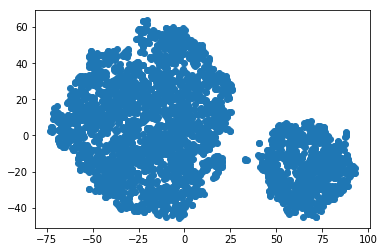

In [75]:
# в 1-ом аргументе подставляем 1-ый столбец, а во 2-ой - 2-ой
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

In [76]:
# Какое-то разделение заметно, но попробуем раскрасить пользователей по ушедшим и лояльным:

In [78]:
df2['Churn'].head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

In [79]:
df2['Churn'].values # превратим df['Churn'] в вектор той же длины

array([False, False, False, ..., False, False, False])

In [80]:
# Этим вектором и попробуем проиндексировать
tsne.embedding_[df2['Churn'].values, 0].shape

(483,)

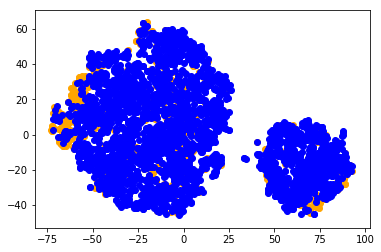

In [83]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color='blue');